## Imports

---



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from google.colab import files
import io
from IPython.display import clear_output
clear_output()


## Carga del dataset

In [10]:
uploaded = files.upload()

Saving student_habits_performance.csv to student_habits_performance.csv


In [11]:
df = pd.read_csv(io.BytesIO(uploaded['student_habits_performance.csv']))
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


## Descripción del dataset

In [12]:
print(df[df.parental_education_level.isnull()])

    student_id  age  gender  study_hours_per_day  social_media_hours  \
10       S1010   19  Female                  4.6                 3.7   
33       S1033   18  Female                  4.0                 0.9   
47       S1047   23  Female                  2.5                 2.9   
74       S1074   21  Female                  2.3                 1.0   
93       S1093   22    Male                  4.1                 2.5   
..         ...  ...     ...                  ...                 ...   
921      S1921   23  Female                  4.4                 2.7   
925      S1925   19   Other                  1.7                 2.9   
939      S1939   18  Female                  4.7                 3.2   
945      S1945   23    Male                  6.0                 2.9   
967      S1967   22    Male                  5.2                 4.1   

     netflix_hours part_time_job  attendance_percentage  sleep_hours  \
10             0.8            No                   77.6        

### 91 datos de la serie parental_education_level son valores nulos, y representan el 9,1% de los datos, nos conviene imputarlos con la moda de dicha serie. Si es bimodal, asignaremos aleatoriamente los dos valores, respetando su proporción.

## Analisis de la variable parental_education_level

In [13]:
# Extraemos la serie
educacionPadres = df['parental_education_level']

In [14]:
# Comprobamos cuantas veces aparece cada categoria dentro de la serie
conteo = educacionPadres.value_counts(dropna=False) # para q me muestre los Nan
print(conteo)

parental_education_level
High School    392
Bachelor       350
Master         167
NaN             91
Name: count, dtype: int64


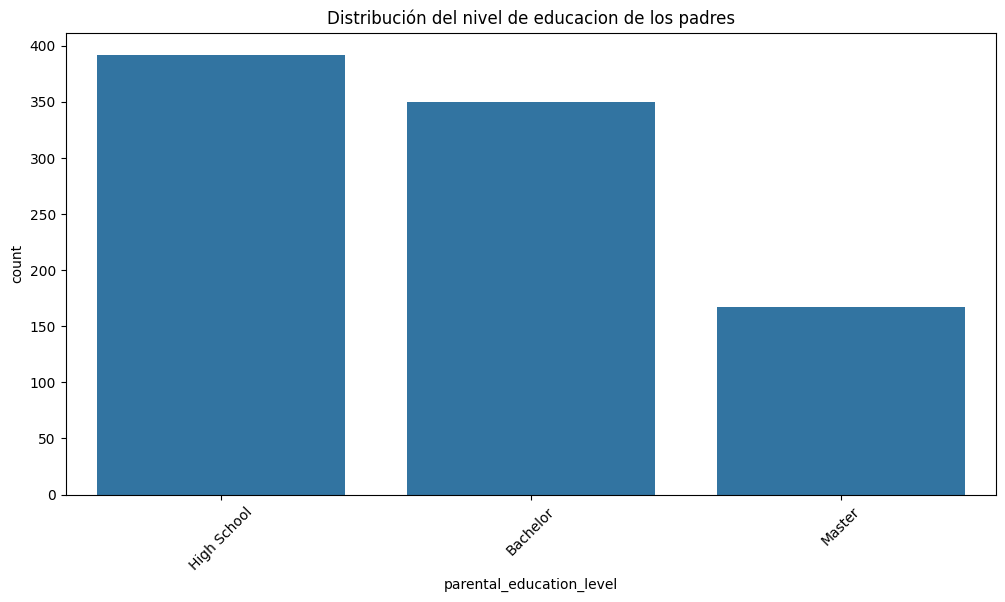

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'parental_education_level', order = educacionPadres.value_counts().index) #los Nan no se pueden graficar con sns
plt.title('Distribución del nivel de educacion de los padres')
plt.xticks(rotation = 45)
plt.show()

## Cálculo de proporciones para evaluar si es una Distribución Bimodalidad

In [16]:
porcentajes = educacionPadres.value_counts(normalize = True,dropna=False)*100
print(porcentajes)

parental_education_level
High School    39.2
Bachelor       35.0
Master         16.7
NaN             9.1
Name: proportion, dtype: float64


### Claramente tenemos una Distribución Bimodal, con dos categorías, que representan el 74,2% de los datos, por lo tanto no es recomendado eliminar los valores Nan. Podemos agregar otra categoría que sea desconocida, pero sería agregar más datos, de los cuales no sabemos nada. Por otra parte, podemos imputar los Nan en relación a la proporción que hay con las 2 modas, esto es asignar los Nan aleatoriamente a "high_school" o "bachelor" respetando sus proporciones.


*   Ventaja: Mantiene la distribución original.
*   Desventaja: Introduce aleatoriedad.



In [17]:
# Extraemos los Nan de la serie 'parental_education_level' por su indice
indices_nan = df[df['parental_education_level'].isna()].index

# como tenemos una lista de indices que tienen los nan de ''parental_education_level''
df.loc[indices_nan,'parental_education_level'] = np.random.choice(
    ['High School','Bachelor'],
    size = len(indices_nan),
    p = [0.392/0.742, 0.35/0.742]
) # esto agarra de la serie parental_education_level los indices que tienen Nan,
  # y le asigna aleatoriamente con np.random.choice el valor High school o Bachelor
  #size = len(indices_nan) hace q genere tantos valores aleatorios como tengo en indices nan (91)
  # p = .... como del total 0,742 es lo q representan los valores bimodales de este total saco el porcentaje
  # entonces me da la probabilidad proporcional a cada categoria segun su distribucion real. es la proporcion real digamos.


In [18]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [19]:
df.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


## Distribución de la variable respuesta 'exam_score'

### Nos importa la distribución de la variable respuesta por:
1. Elección del modelo
Algunos algoritmos hacen supuestos sobre la distribución de la variable respuesta. Por ejemplo:

En regresión lineal, se asume que los residuos (errores) están normalmente distribuidos.

En regresión logística, se espera que la variable respuesta sea binaria o categórica.

En modelos probabilísticos (como Naive Bayes), la distribución afecta directamente las predicciones.

2. Transformaciones y normalización (para regresión)
Si la variable respuesta tiene una distribución muy sesgada (skewed), puede perjudicar el rendimiento de algunos modelos. En ese caso, se pueden aplicar transformaciones como:

Logarítmica (log(y)),

Box-Cox,

Raíz cuadrada, etc.

Estas transformaciones ayudan a que el modelo aprenda mejor si se necesita una distribución más normal.
3. Evaluación y validación
Conocer la distribución ayuda a:

Dividir mejor los datos (por ejemplo, usar estratificación si hay clases desbalanceadas),

Interpretar correctamente errores o métricas,

Detectar si el modelo sobreajusta o no generaliza bien en ciertas partes del espacio de salida.
4. Interpretabilidad
Saber cómo se distribuye la variable objetivo permite:

Identificar outliers o valores atípicos,

Detectar patrones anómalos,

Ajustar expectativas sobre el modelo (por ejemplo, si la mayoría de los valores de y están entre 10 y 20, pero hay algunos de 1000, podrías necesitar un enfoque especial).




<Axes: xlabel='exam_score', ylabel='Density'>

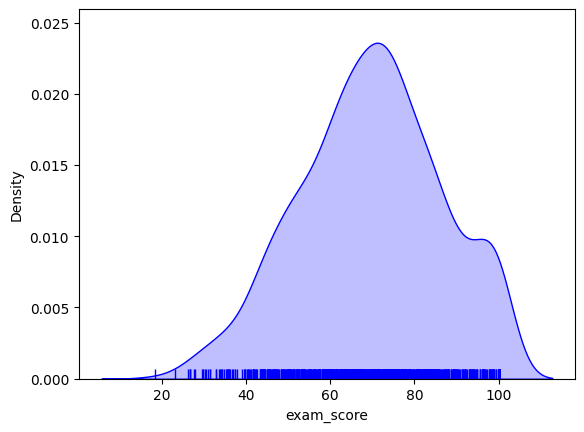

In [20]:
sns.kdeplot(
    df.exam_score,
    fill =True,
    color = 'blue',
)
sns.rugplot(
    df.exam_score,
    color ='blue'
)


## Vemos un sesgo positivo y q los datos estan muy aglomerados entorno a la media, como es esta variable la que nos interesa predecir. queremos de q sea lo mas normal en lo posible para tener mejor control sobre la variable, entonces normalizamos los datos.. vamos a aplicar una normalizacion logaritmica y de raiz cuadrada para comparar.

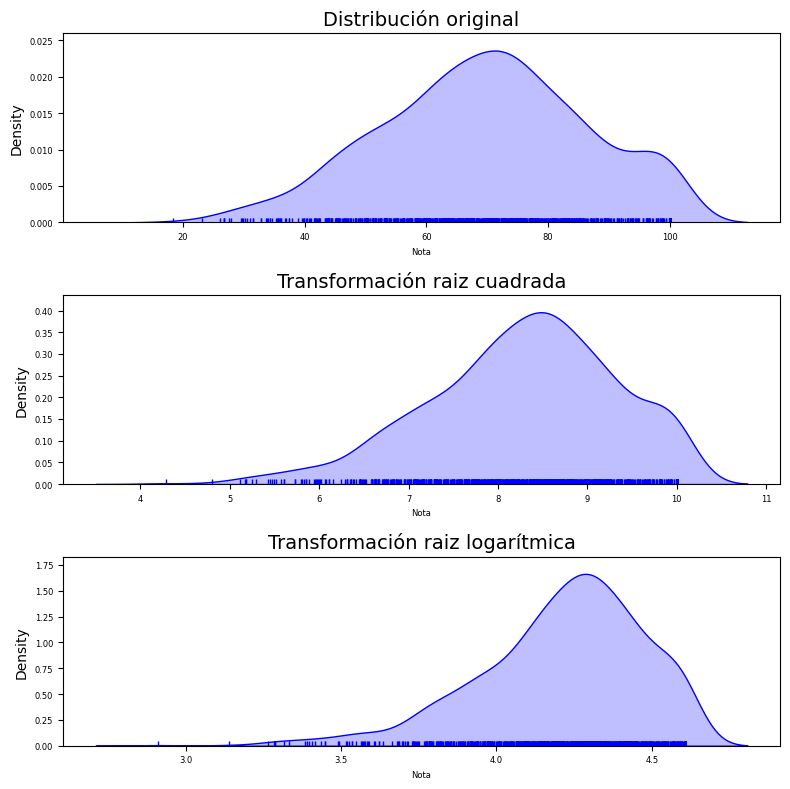

In [21]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (8,8))
sns.kdeplot(
    df.exam_score,
    fill = True,
    color ='blue',
    ax = axes[0]
)
sns.rugplot(
    df.exam_score,
    color = 'blue',
    ax = axes[0]
)
axes[0].set_title('Distribución original', fontsize =14 )
axes[0].set_xlabel('Nota', fontsize = 6)
axes[0].tick_params(labelsize = 6)

#----------------------------------------------------------------
sns.kdeplot(
    np.sqrt(df.exam_score), # acá transformamos por raiz cuadrada.
    fill = True,
    color = 'blue',
    ax = axes[1]
)
sns.rugplot(
    np.sqrt(df.exam_score),# acá transformamos por raiz cuadrada.
    color = 'blue',
    ax = axes[1]
)
axes[1].set_title('Transformación raiz cuadrada',fontsize =14)
axes[1].set_xlabel('Nota',fontsize = 6)
axes[1].tick_params(labelsize = 6)
#---------------------------------------------------------------------
sns.kdeplot(
    np.log(df.exam_score), # acá transformamos por log cuadrada.
    fill = True,
    color = 'blue',
    ax = axes[2]
)
sns.rugplot(
    np.log(df.exam_score),# acá transformamos por log.
    color = 'blue',
    ax = axes[2]
)
axes[2].set_title('Transformación raiz logarítmica',fontsize =14)
axes[2].set_xlabel('Nota',fontsize = 6)
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [1]:
!pip install fitter
from fitter import Fitter, get_common_distributions

## Para hacer una prueba a que distribucion se aproxima mas nuestra variable respuesta usamos fitter

In [23]:

!pip install --upgrade fitter

In [24]:
dist = ['chi2','cauchy', 'exponpow','expon','gamma','norm','powerlaw','beta','logistic']
fitter = Fitter(df.exam_score, distributions=dist)
fitter.fit()
fitter.summary(Nbest=10,plot = False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.005190,985.702409,995.517920,inf,0.035864,1.490117e-01
gamma,0.005201,993.216125,1007.939391,inf,0.039076,9.189001e-02
chi2,0.005255,996.480514,1011.203780,inf,0.041500,6.206239e-02
logistic,0.005271,981.866178,991.681688,inf,0.043740,4.229109e-02
beta,0.005544,972.664744,992.295765,inf,0.054228,5.370036e-03
cauchy,0.006324,1008.839400,1018.654911,inf,0.106730,2.252889e-10
powerlaw,0.007239,932.140185,946.863451,inf,0.142039,4.573714e-18
exponpow,0.015709,967.897851,982.621116,inf,0.299856,3.104356e-80
expon,0.018121,950.524097,960.339607,inf,0.331476,2.035064e-98


### **loc = 69.6015:**
Es el valor medio (μ) de la distribución → la media de los puntajes de examen.
### **scale = 16.8801:**
Es la desviación estándar (σ) → indica cuánto varían los puntajes respecto a la media.

## vemos que la distribución nomarl es la que mejor se ajusta, ya que la suma de los errores cuadráticos es la menor, los criterios de Akaike(aic) y Bayesiano (bic) que penalizan por complejidad de modelo son los mas bajos y el test de kolmogorov-Smirnov (ks-statistics) el cual mide la funcion distribucion acumulada real vs la teorica, osea por ejemplo, en la normal teorica me dice que el 25% está abajo de 65 puntos y mis datos dicen que el 30% estan por debajo, entonces hace esa diferencia. además el valor p para ks es mayor a 0.05 por lo tanto la distribución normal es la que mejor ajusta


---



## Análisis de variables cualitativas o categóricas


In [25]:
df.select_dtypes(include=['object']).describe()

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,2,3,3,3,2
top,S1000,Female,No,Fair,High School,Good,No
freq,1,481,785,437,448,447,682


In [26]:
dfCat= df.select_dtypes(include=['object'])
dfCat = dfCat.drop('student_id', axis=1)

In [27]:
dfCat.head()

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
0,Female,No,Fair,Master,Average,Yes
1,Female,No,Good,High School,Average,No
2,Male,No,Poor,High School,Poor,No
3,Female,No,Poor,Master,Good,Yes
4,Female,No,Fair,Master,Good,No


## Distribución de variables cualitativas

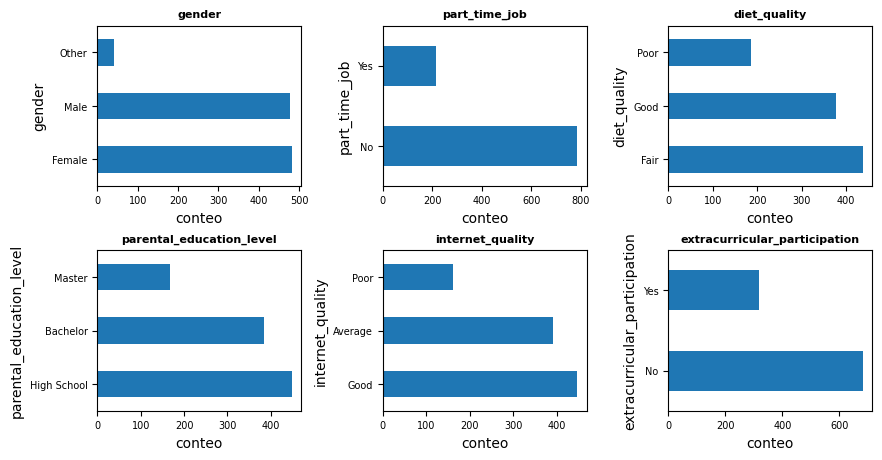

In [28]:
fig, axes = plt.subplots(nrows=2,ncols=3, figsize =(10,5))
axes = axes.flat #para poder usar el for con los plots
col_cualitativas = dfCat.columns

for i, colum in enumerate(col_cualitativas):
  dfCat[colum].value_counts().plot.barh(ax = axes[i])
  axes[i].set_title(colum, fontsize = 8, fontweight='bold')
  axes[i].tick_params(labelsize = 7)
  axes[i].set_xlabel("conteo")
fig.tight_layout
plt.subplots_adjust(hspace=0.4, wspace=0.4)

## Relacion entre las notas y las variables cualitativas

## esto lo vemos con un boxplot con su distribución o diagrama de violin 🎻

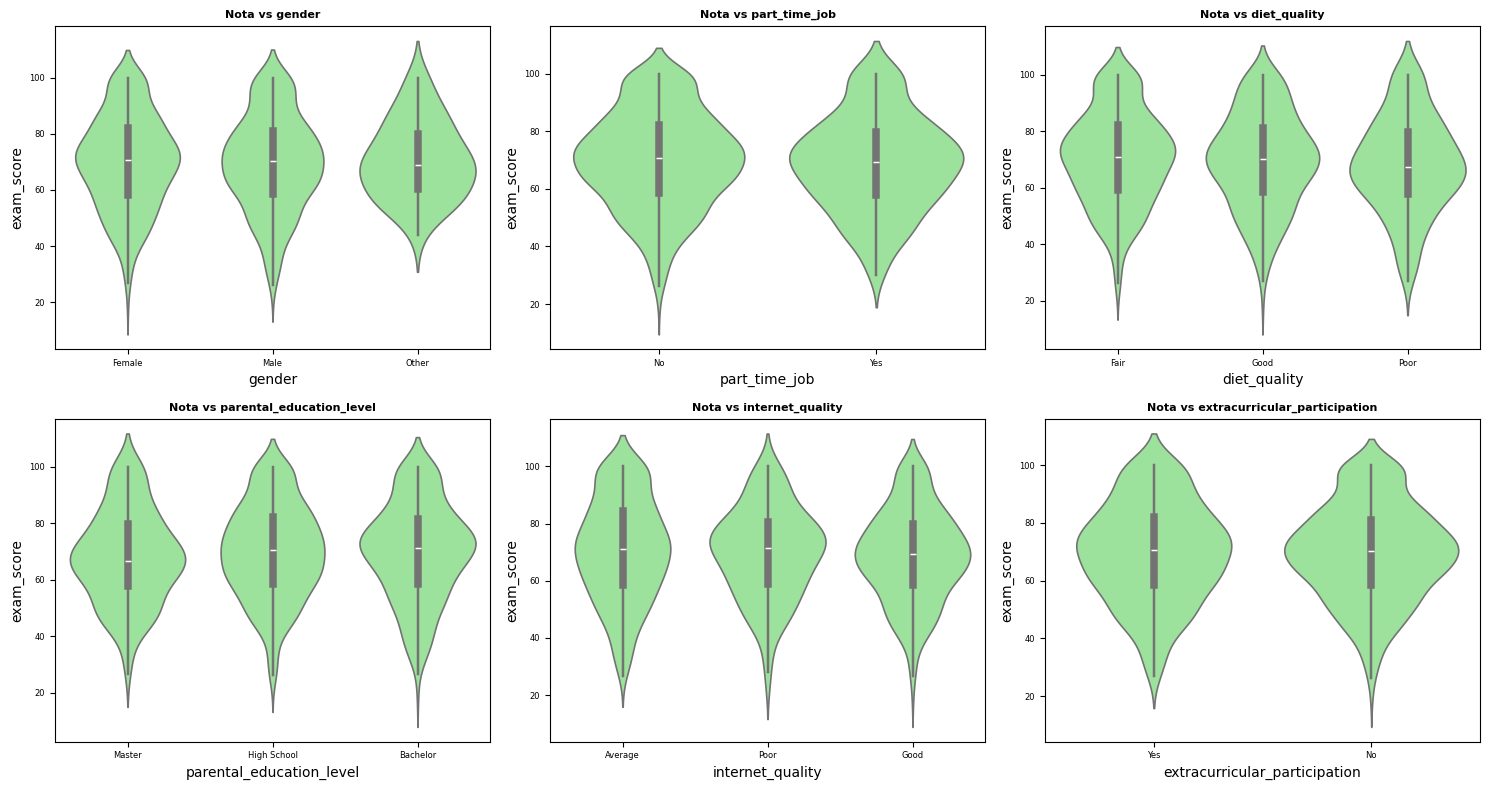

In [29]:
df1 = df.drop('student_id', axis=1)
fig, axes = plt.subplots(nrows=2,ncols=3, figsize =(15,8))
axes = axes.flat
columnas_cualitativas = df1.select_dtypes(include=['object']).columns

for i, columna in enumerate(columnas_cualitativas):
  sns.violinplot(
      data = df1,
      x = columna,
      y = 'exam_score',
      inner='box',
      linewidth=1.2,
      color='lightgreen',
      #palette='Set3',
      #color = 'blue',
      ax = axes[i]

  )
  axes[i].set_title(f'Nota vs {columna}',fontsize = 8, fontweight = 'bold')
  axes[i].tick_params(labelsize = 6)
  fig.tight_layout()


## Tree Map 🌳

##Se nos hizo interesante mostrar la relación entre el nivel educativo de los padres y el rendimiento estudiantil en términos de género. En general, observamos que a medida que aumenta el nivel educativo de los padres, los puntajes de los estudiantes tienden a aumentar.

In [30]:
fig = px.treemap(
    df,
    path=['parental_education_level', 'gender'],
    values='exam_score',
    color='exam_score',
    color_continuous_scale='Viridis',
    hover_data={
        'exam_score': True,         # Mostrar score exacto
        'sleep_hours': True,        # Horas de sueño
        'study_hours_per_day': True  # Horas de estudio
    },
    title='Score por Nivel Educativo de los Padres y Género'
)

fig.update_traces(
    textinfo='label+value+percent parent',  # Esto es más para go.Treemap, pero lo dejamos por compatibilidad
    texttemplate='%{label}<br>%{value:.1f}',  # Texto dentro del cuadro
    insidetextfont=dict(size=12)
)
import plotly.io as pio
pio.renderers.default = 'colab'
fig.show()

### **Cómo está relacionadas nuestras variables categóricas con los puntajes de examen? es decir dentro de una misma categoria dentro de mis variables cualitativas cambiara la nota? un alumno que trabaja media jornada tiene en promedio menos nota que uno que no lo hace?**

### Para responder esto vamos a realizar un test de la t de estudent para variables que tengan 2 categorias y comparar sus medias.
### Para variables que tengan 3 o mas categorias se utiliza el Analisisd de varianza ANOVA.

In [31]:
from scipy.stats import ttest_ind, f_oneway

In [32]:
dfPrueba = pd.concat([dfCat,df['exam_score']], axis = 1)

In [33]:
dfPrueba.head()

,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation,exam_score
0,Female,No,Fair,Master,Average,Yes,56.2
1,Female,No,Good,High School,Average,No,100.0
2,Male,No,Poor,High School,Poor,No,34.3
3,Female,No,Poor,Master,Good,Yes,26.8
4,Female,No,Fair,Master,Good,No,66.4


In [34]:
var_objetivo = 'exam_score'
var_categoricas = ['diet_quality', 'parental_education_level', 'internet_quality',
            'part_time_job', 'extracurricular_participation', 'gender']

resultados = []

# hacemos un for para que vaya aplicando t-student o anova segun las keys que tiene cada categoria
# guardamos en resultados cada variable categorica el tipo de test que se le hizo, el valor p de significancia y si es significativo o no
#luego graficamos los resultados delos significativos

for var in var_categoricas:
  grupos = dfPrueba.groupby(var)[var_objetivo]
  categorias = grupos.groups.keys()

  if len(categorias) == 2:
        grupo1 = grupos.get_group(list(categorias)[0])
        grupo2 = grupos.get_group(list(categorias)[1])
        stat, p = ttest_ind(grupo1, grupo2)
        nombre_test = 't-test'

  elif len(categorias) > 2:
        valores = [grupo for _, grupo in grupos]
        stat, p = f_oneway(*valores) # * me descomprime la lista para poder usarla en f_oneway (ANNOVA)
        nombre_test = 'ANOVA'
  else:
        continue

  resultados.append({
        'variable': var,
        'test': nombre_test,
        'p_valor': p,
        'significativo': p < 0.05
    })

# pasamos a dataframe los resultados

df_resultado = pd.DataFrame(resultados)
res_signif = df_resultado[df_resultado['significativo'] == True].sort_values(by='p_valor')







In [35]:
### como no tuvimos variables significativas ponemos prints para ver los p valor
for var in var_categoricas:
    grupos = df.groupby(var)[var_objetivo]
    categorias = grupos.groups.keys()
    print(f"\nAnalizando variable: {var} - categorías: {list(categorias)}")

    if len(categorias) == 2:
        grupo1 = grupos.get_group(list(categorias)[0])
        grupo2 = grupos.get_group(list(categorias)[1])
        print(f"Tamaño grupos: {len(grupo1)} y {len(grupo2)}")
        stat, p = ttest_ind(grupo1, grupo2)
        test_name = 't-test'
    elif len(categorias) > 2:
        valores = [grupo for _, grupo in grupos]
        print(f"Cantidad de grupos: {len(valores)}")
        stat, p = f_oneway(*valores)
        test_name = 'ANOVA'
    else:
        print("No se puede comparar, solo hay una categoría")
        continue

    print(f"p-valor: {p:.4f}")
    resultados.append({
        'variable': var,
        'test': test_name,
        'p_valor': p,
        'significativo': p < 0.05
    })


Analizando variable: diet_quality - categorías: ['Fair', 'Good', 'Poor']
Cantidad de grupos: 3
p-valor: 0.2824

Analizando variable: parental_education_level - categorías: ['Bachelor', 'High School', 'Master']
Cantidad de grupos: 3
p-valor: 0.4469

Analizando variable: internet_quality - categorías: ['Average', 'Good', 'Poor']
Cantidad de grupos: 3
p-valor: 0.2320

Analizando variable: part_time_job - categorías: ['No', 'Yes']
Tamaño grupos: 785 y 215
p-valor: 0.4006

Analizando variable: extracurricular_participation - categorías: ['No', 'Yes']
Tamaño grupos: 682 y 318
p-valor: 0.9778

Analizando variable: gender - categorías: ['Female', 'Male', 'Other']
Cantidad de grupos: 3
p-valor: 0.8674


### Estos p-valores altos (todos mayores a 0.05) indican que no hay evidencia estadísticamente significativa de que las variables categóricas estén asociadas con el puntaje del examen (exam_score)

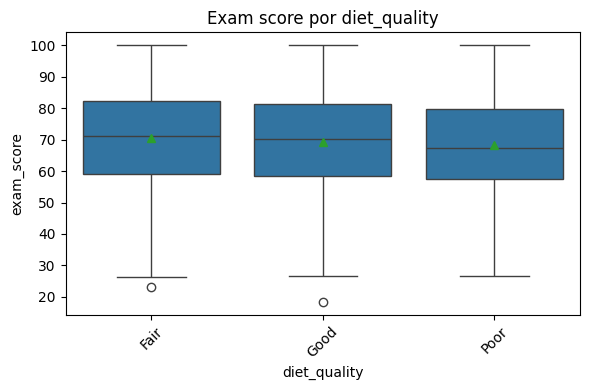

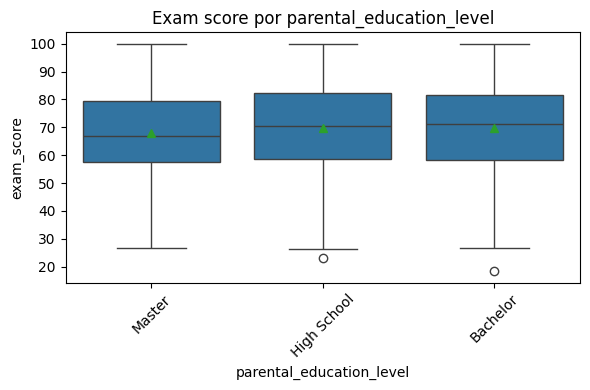

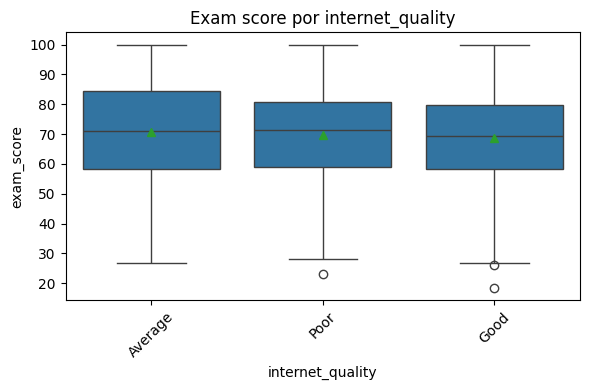

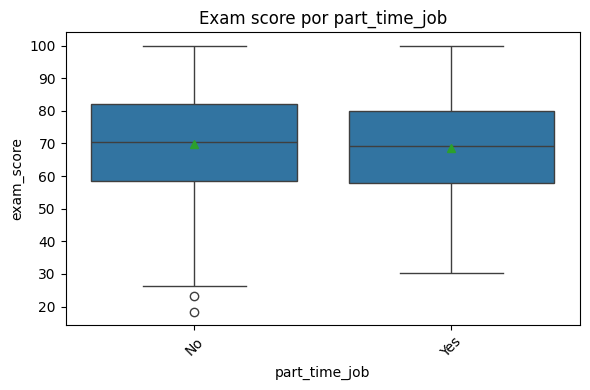

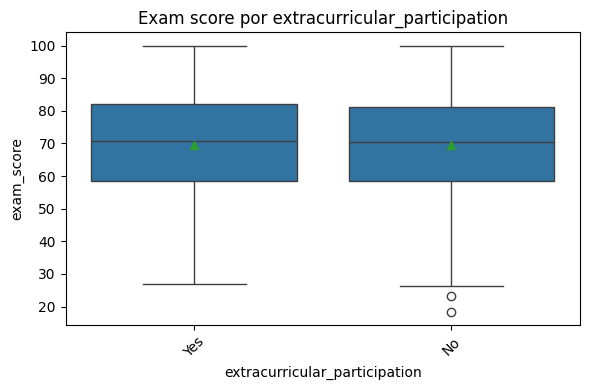

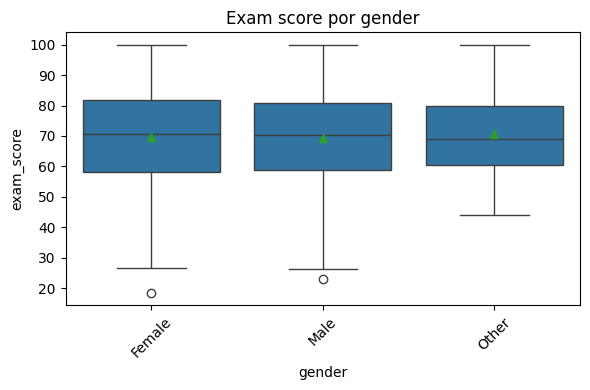

In [36]:

for var in var_categoricas:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=var, y='exam_score',showmeans=True)
    plt.title(f'Exam score por {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

La nota (exam_score) se comporta de forma similar sin importar el género, si tienen trabajo de medio tiempo, la calidad del internet, etc.

Puede que estas variables no influyan directamente en el rendimiento académico medido por ese puntaje.

O bien, puede que influyan indirectamente o en combinación con otras que no estamos incluyendo (por ejemplo, salud mental, horas de estudio, motivación, etc.)

# Análisis de Variables Numéricas

In [37]:
#Identificamos variables numéricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
print("Variables numéricas:", list(columnas_numericas))

Variables numéricas: ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']


In [38]:
#Estaditicas descriptivas
print(df[columnas_numericas].describe())


             age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.200000            0.

In [39]:
# borramos la variable respuesta('exam_score') de las columnas numericas porque ya la analizamos.
dfNumerico= df.select_dtypes(include=['int64', 'float64'])
dfNumerico=dfNumerico.drop('exam_score', axis = 1)
dfNumerico.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating
0,23,0.0,1.2,1.1,85.0,8.0,6,8
1,20,6.9,2.8,2.3,97.3,4.6,6,8
2,21,1.4,3.1,1.3,94.8,8.0,1,1
3,23,1.0,3.9,1.0,71.0,9.2,4,1
4,19,5.0,4.4,0.5,90.9,4.9,3,1


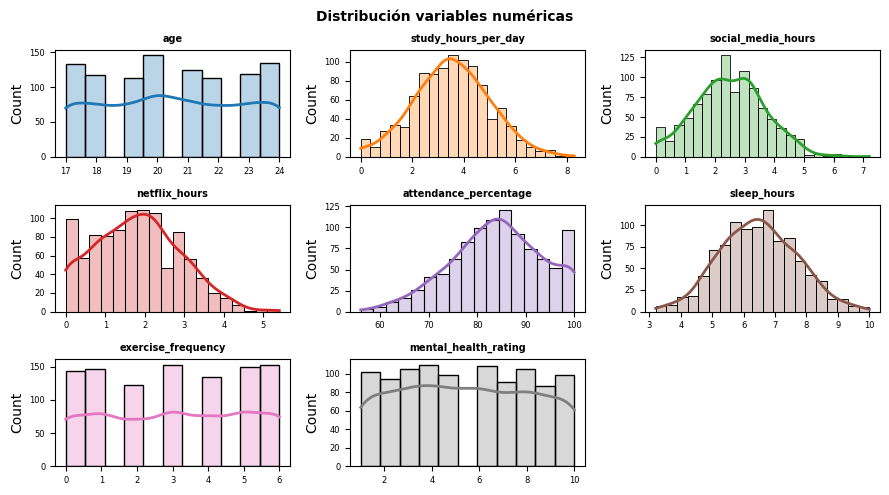

In [40]:
#Histograma para ver dsitribución
#df[numeric_cols].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
#plt.suptitle('Histograma de Variables Numéricas', fontsize=16)
#plt.tight_layout()
#plt.show()
#----------------------------------------------------------------------------------------

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = dfNumerico.columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = dfNumerico,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

for i in [8]:
  fig.delaxes(axes[i])

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");


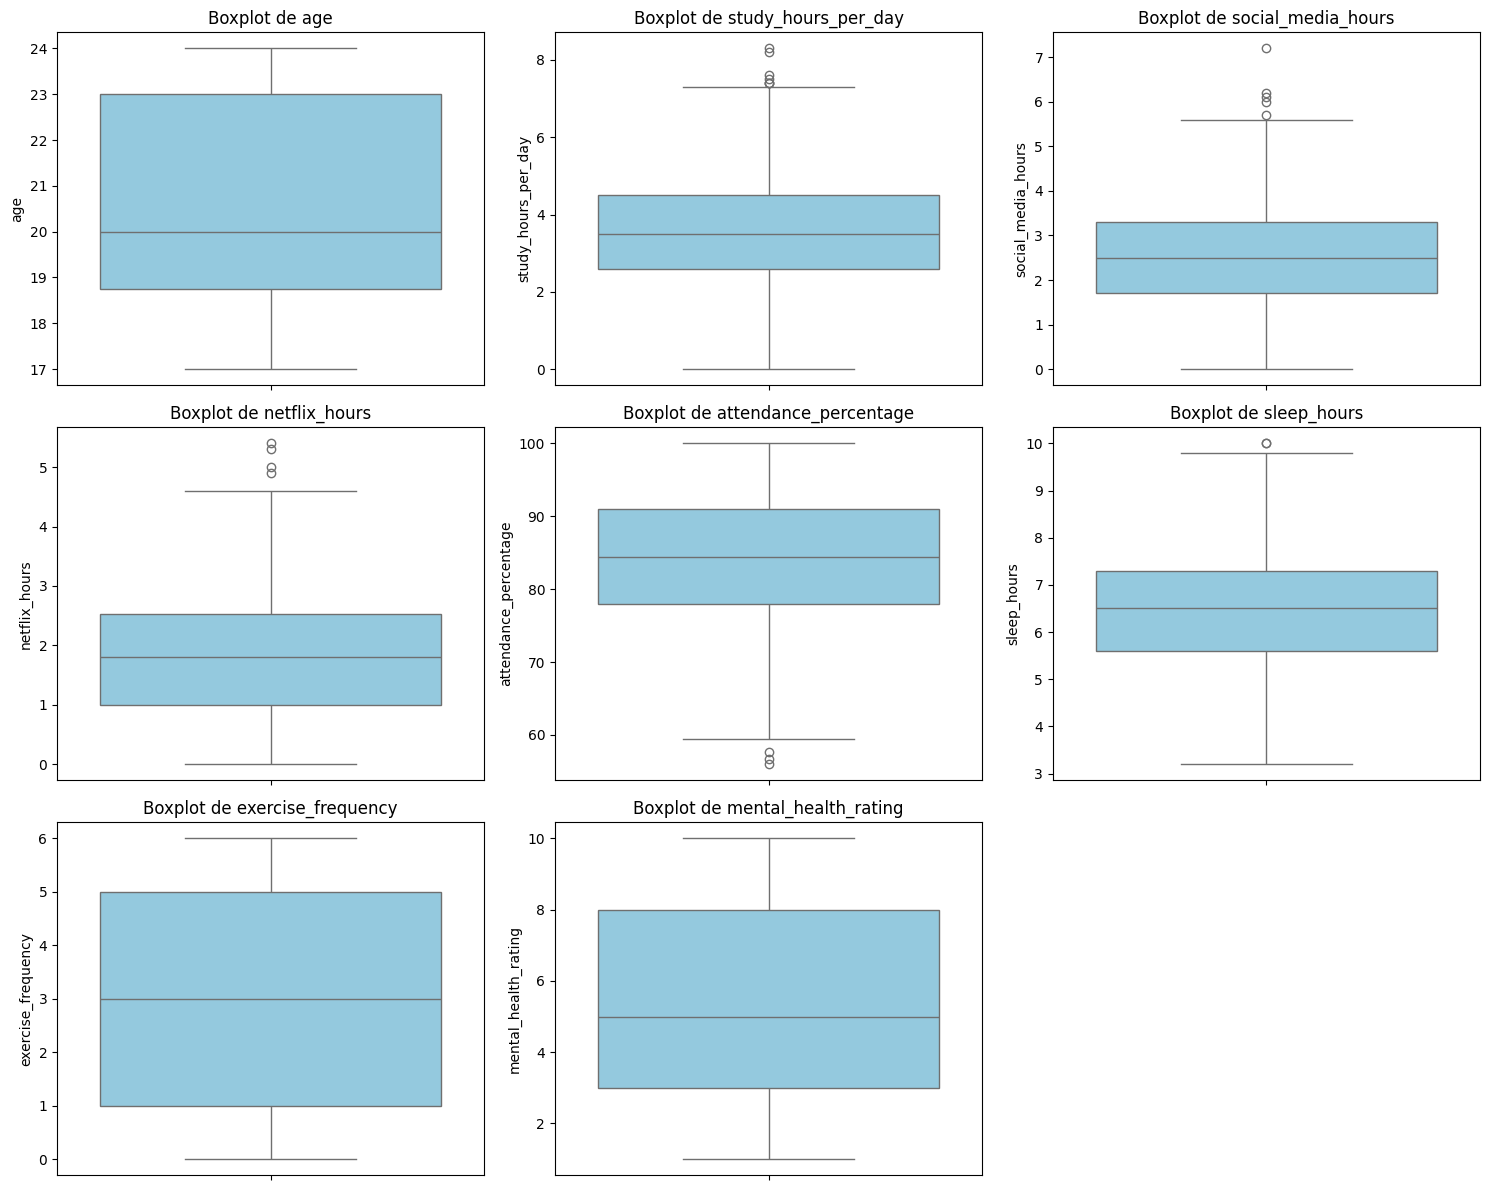

In [41]:
#Boxplots para detectar outliers
import math
n_cols = 3
n = len(columnas_numeric)
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(columnas_numeric):
   ax = plt.subplot(n_rows, n_cols, i + 1)
   sns.boxplot(data=df, y=col, color='skyblue', ax=ax)
   plt.title(f'Boxplot de {col}')
   plt.tight_layout()
plt.show()


Podemos observar outlaiers en las variables study_hours_per_day,

social_media_hours, netflix_hours,attedance_percetage y sleep_hours y exam_score


---




### Como el objetivo del estudio es predecir la nota de examen, el análisis de cada variable se hace también en relación a la variable respuesta 'exam_score'. Analizando los datos de esta forma, se pueden empezar a extraer ideas sobre qué variables están más relacionadas con la nota de examen y de qué forma.

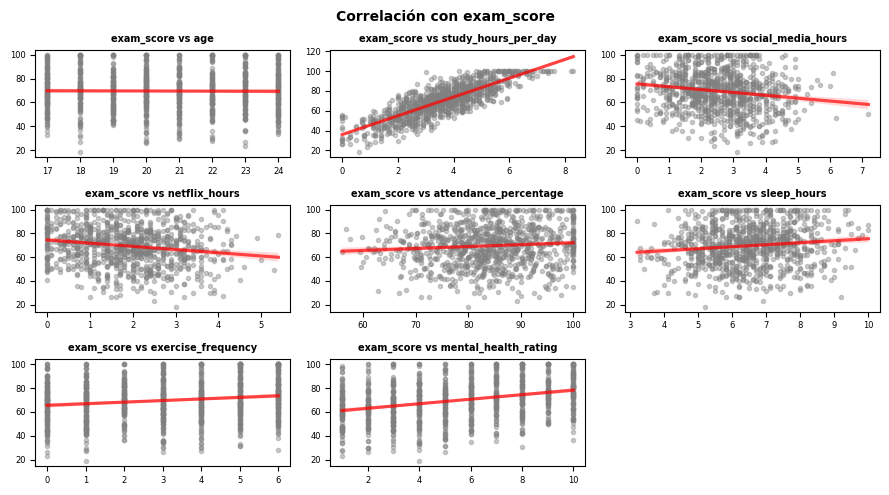

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('exam_score')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['exam_score'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"exam_score vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con exam_score', fontsize = 10, fontweight = "bold");

### Como algunas de las variables predictoras pueden ser colineales o estar correlacionas y esto afecta la precision ya que me aportan información repetida de los modelos de regresion y pueden desencadenar los siguientes problemas:


*   **Los coeficientes del modelo se vuelven inestables.**
      Pequeños cambios en los datos pueden provocar grandes cambios en los coeficientes

*   **Dificulta la interpretación de los coeficientes.**
      No sabés bien cuál variable está "explicando" el efecto.

*   **Puede ocultar relaciones reales.**
      Algunas variables pueden parecer poco importantes solo porque están solapadas con otras.

*   **Puede provocar que el modelo no sea generalizable.**
      Es decir, puede funcionar bien en el entrenamiento, pero mal en nuevos datos.





### Vamos a intentar ver que coeficiente de correlacion de Pearson tienen las variables, esto para q sea mas legible se hace con el formato Tidy

In [43]:
def tidy_corr_matrix(corr_mat):

    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)


,variable_1,variable_2,r,abs_r
73,exam_score,study_hours_per_day,0.825419,0.825419
17,study_hours_per_day,exam_score,0.825419,0.825419
79,exam_score,mental_health_rating,0.321523,0.321523
71,mental_health_rating,exam_score,0.321523,0.321523
75,exam_score,netflix_hours,-0.171779,0.171779
35,netflix_hours,exam_score,-0.171779,0.171779
26,social_media_hours,exam_score,-0.166733,0.166733
74,exam_score,social_media_hours,-0.166733,0.166733
62,exercise_frequency,exam_score,0.160107,0.160107
78,exam_score,exercise_frequency,0.160107,0.160107


## Así obtuvimos un "Ranking" de las variables que estan mas fuertemente correlacionadas.
Lo cual nos da un pantallazo para ver que ningun r está por encima de 0,8 a excepción de study_hours_per_day con exam_score.

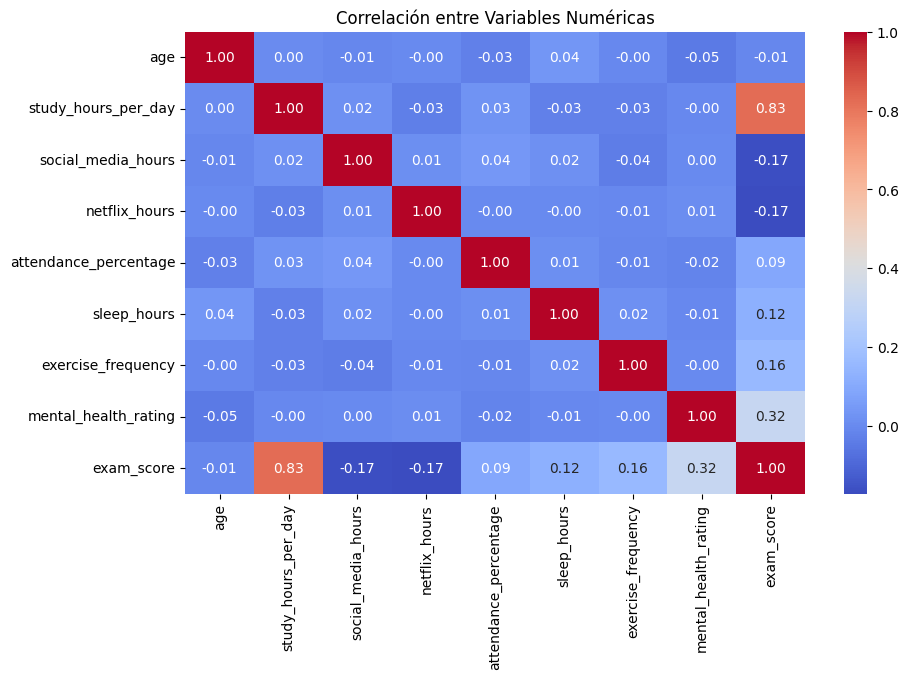

In [44]:
#Correlacion entre variable numericas
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=['float64', 'int']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Variables Numéricas')
plt.show()


Un coeficiente de 0.83 entre Study_hours_per_day y exam_score indica una relacion lineal fuerte y positiva, conforme aumentan las horas de estudio diarias , tienden a subir las notas de examen.



In [45]:
df.to_csv('Output_Tratamiento.csv', index=False)